In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100, 2))  # 100个样本，每个含2个特征
X[:,0] = np.random.uniform(0., 100., size=100) # 第一个特征
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0, 10., size=100) # 第二个特征

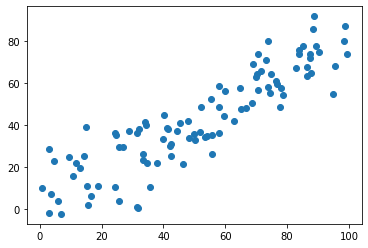

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### demean

In [4]:
def demean(X):
    return X - np.mean(X, axis = 0)  # 每个样本里的特征减去每一个特征的均值
# 如果X是m * n的矩阵，则np.mean(X, axis = 0)为1 * n的向量，向量里的每一个值都是该特征的均值

In [5]:
X_demean = demean(X)

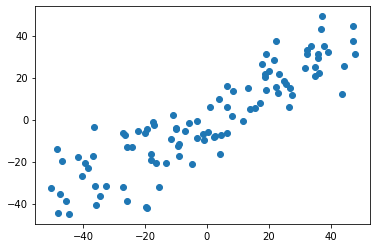

In [6]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()  # 可以发现坐标轴发生了移动

In [7]:
np.mean(X_demean[:, 0]) # 第0个维度的均值，为0

-1.0302869668521452e-14

In [8]:
np.mean(X_demean[:, 1])

-7.815970093361103e-15

### 梯度上升法

In [9]:
# 求目标函数
def f(w, X):
    return np.sum((X.dot(w) ** 2)) / len(X) 

# 利用数学推导求的梯度
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

# 调试验证梯度是否正确
# 因为w是个模为1的方向向量，它的每一个特征都很小。故epsilon也取的很小
def df_debug(w, X, epsilon = 0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

# 对方向向量进行单位化
def direction(w):
    return w / np.linalg.norm(w)

# 梯度上升
def gradient_ascent(df, X, initial_w, eta, n_iters = 1e4, epsilon = 1e-8):
    
    # w的模可能超过1，先对其进行单位化
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient # w的模可能超过1
        w = direction(w) # 注意1：每次求一个单位方向
        # 因为我们的数学公式推导中，假设w为单位向量。如果w的模大于1，这会导致搜索过程不顺畅。
        # 为了让搜索得到合理的结果，就得让eta的值很小。eta很小，搜索次数就变大，算法性能就下降。
        # 故每一次要进行单位化
        
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        cur_iter += 1
        
    return w

In [10]:
# 注意2：初始化不能从0向量开始
# 在求梯度的数学公式中X.dot(w)。如果w为0向量的话，那么结果始终都会为0向量
initial_w = np.random.random(X.shape[1])
initial_w 

array([0.06630611, 0.50781099])

In [11]:
eta = 0.001
# 注意3: 不能使用StandardScaler标准化数据
# PCA就是要求一个轴，使得所有样本映射到该轴后样本的方差最大。如果样本数据进行标准化了，
# 样本的方差就为1了，那么方差的最大值就不存在了。

In [12]:
gradient_ascent(df_debug, X_demean, initial_w, eta) # 得到所求轴(w1,w2)

array([0.76899636, 0.63925316])

In [13]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.76899636, 0.63925316])

In [14]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

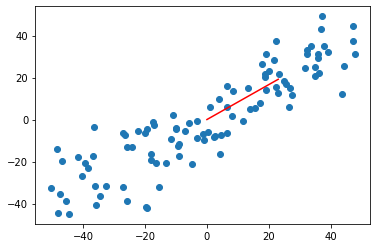

In [16]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0] * 30], [0, w[1] * 30], color = 'r') # 绘制出该轴，*30是因为w是单位向量，太小了，放大显示
plt.show()

### 使用极端数据集验证

In [17]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size=100)
X2[:,1] = 0.75 * X2[:,0] + 3.

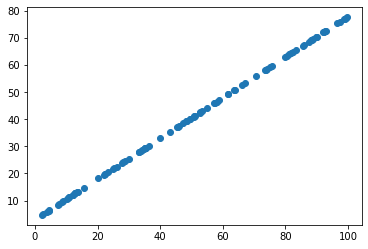

In [18]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [19]:
X2_demean = demean(X2)

In [20]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

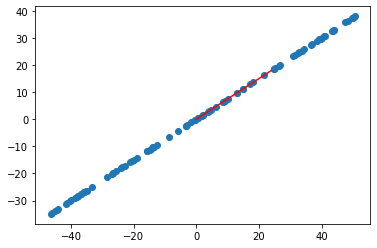

In [22]:
plt.scatter(X2_demean[:,0], X2_demean[:,1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color='r')
plt.show()

### 总结

本小节，只求了对于二维数据来说相应的一个主成分。对于二维数据，映射到一维就已经足够了。
但是如果是1000维的数据，那么可能需要映射到10维上。那么需要求出第2，3，4等主成分。